In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
%run livecricket_functions.py

In [3]:
#single processed file
processed_file = pd.read_csv('myfile.csv')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D5-A_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')
#processed_file = pd.read_excel('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Germ-free(GF)/D5-C_1_F-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx')

In [4]:
processed_file

,Second,Frame,nosex,nosey,noselikelihood,noseFreeze,leftearx,lefteary,leftearlikelihood,leftearFreeze,...,rightearFreeze,tailbasex,tailbasey,tailbaselikelihood,tailbaseFreeze,stimx,stimy,stimlikelihood,stimFreeze,FullBodyFreeze
0,0.000000,0,27.497619,8.847001,1.0,0,27.405908,6.823524,1.0,0,...,0,24.493115,4.333865,0.999994,0,NaN,NaN,0.004451,0,0
1,0.033333,1,27.493756,8.846306,1.0,0,27.399385,6.825284,1.0,0,...,0,24.491511,4.337793,0.999994,0,NaN,NaN,0.004008,0,0
2,0.066667,2,27.523068,8.780606,1.0,1,27.373224,6.822655,1.0,1,...,1,24.494341,4.343025,0.999994,1,NaN,NaN,0.003759,0,1
3,0.100000,3,27.518792,8.771852,1.0,1,27.370281,6.829991,1.0,1,...,1,24.442062,4.325502,0.999995,1,NaN,NaN,0.003620,0,1
4,0.133333,4,27.502271,8.788379,1.0,1,27.384532,6.846642,1.0,1,...,1,24.434391,4.325764,0.999994,1,NaN,NaN,0.003243,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18065,602.166667,18065,80.272858,13.118503,1.0,0,79.774215,14.566622,1.0,0,...,0,81.215672,19.374677,1.000000,0,26.237368,63.771036,1.000000,1,0
18066,602.200000,18066,80.330879,12.852330,1.0,0,79.771394,14.358839,1.0,0,...,0,81.240980,19.205584,1.000000,0,26.239684,63.771187,1.000000,1,0
18067,602.233333,18067,80.393277,12.396724,1.0,0,79.870203,14.139786,1.0,0,...,0,81.237252,18.945174,1.000000,0,26.239780,63.770548,1.000000,1,0
18068,602.266667,18068,80.398429,11.777240,1.0,0,80.058140,13.814704,1.0,0,...,0,81.396092,18.678790,1.000000,0,26.238238,63.771666,1.000000,0,0


In [5]:
fps = 30
mouse_x, mouse_y = get_mouse_centroid(processed_file)
mouse_speed = get_mouse_speed(processed_file)
cricket_speed = get_cricket_speed(processed_file)
heading_cricket_mouse = get_mouse_heading_to_cricket(processed_file)
mouse_displacement = get_distance_travelled(processed_file)
distance_to_cricket = get_distance_to_cricket(processed_file)
print(f"mouse displacement: {mouse_displacement:.2f} cm in {len(processed_file)/fps:.2f} seconds")

# For each of the functions below you can pass a start and end frame to get the data for a specific part of the video
first_10seconds_start = 0
first_10seconds_end = 10*fps
mouse_displacement_10seconds = get_distance_travelled(processed_file,
                                                    first_10seconds_start,
                                                    first_10seconds_end)

print(f"mouse displacement in first 10 seconds: {mouse_displacement_10seconds:.2f} cm")

mouse displacement: 4184.71 cm in 602.33 seconds
mouse displacement in first 10 seconds: 12.51 cm


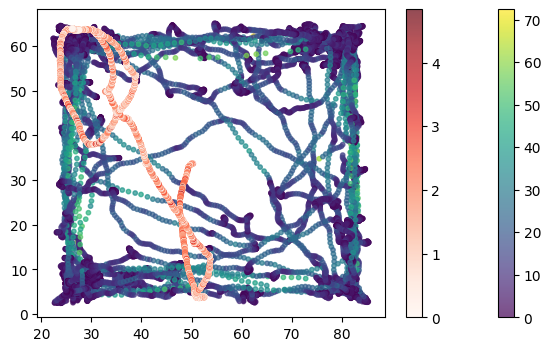

In [6]:
plt.figure(figsize = (7,4), dpi = 100)
plt.scatter(mouse_x,mouse_y, c = mouse_speed, alpha = 0.7, s = 10)
_= plt.colorbar()
plt.scatter(processed_file.stimx,processed_file.stimy, c = cricket_speed, alpha = 0.7, s = 10, cmap = 'Reds')
_ = plt.colorbar()

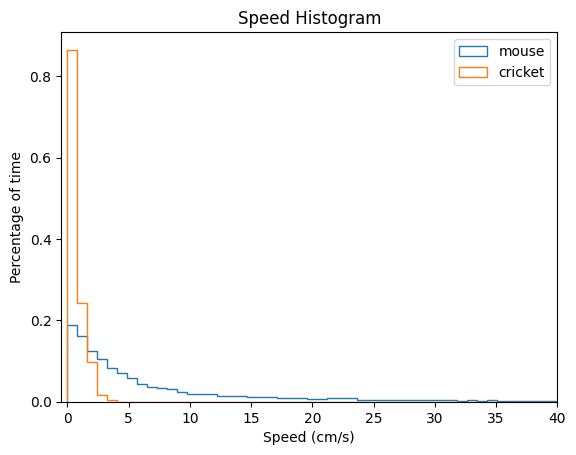

In [7]:
_ = plt.hist(mouse_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'mouse', density = True)
_ = plt.hist(cricket_speed, bins = np.linspace(0, 40, 50), histtype = 'step', label = 'cricket', density = True)
plt.xlim(-0.5, 40)
plt.legend()
plt.xlabel('Speed (cm/s)')
plt.ylabel('Percentage of time')
plt.title('Speed Histogram')
plt.show()

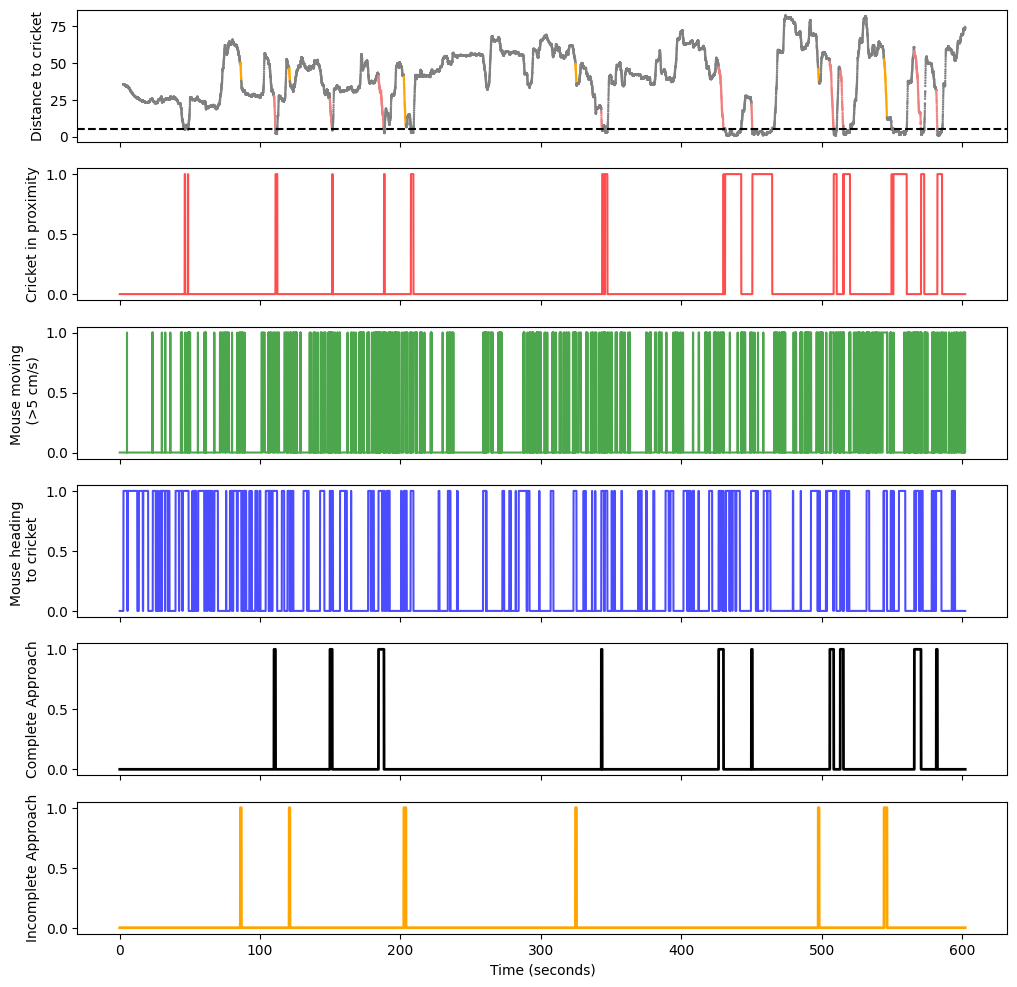

In [8]:
# Get approach events
approach_events, incomplete_approach_events = get_approach_events(distance_to_cricket,
                                                                mouse_speed,
                                                                heading_cricket_mouse,
                                                                processed_file, plot=True)

In [9]:
len(approach_events), len(incomplete_approach_events)

(10, 6)

In [10]:
approach_heading = []
for start, end in approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    approach_heading.append(heading_cricket_mouse_approach)

incomplete_approach_heading = []
for start, end in incomplete_approach_events:
    heading_cricket_mouse_approach = get_mouse_heading_to_cricket(processed_file, start, end)
    incomplete_approach_heading.append(heading_cricket_mouse_approach)

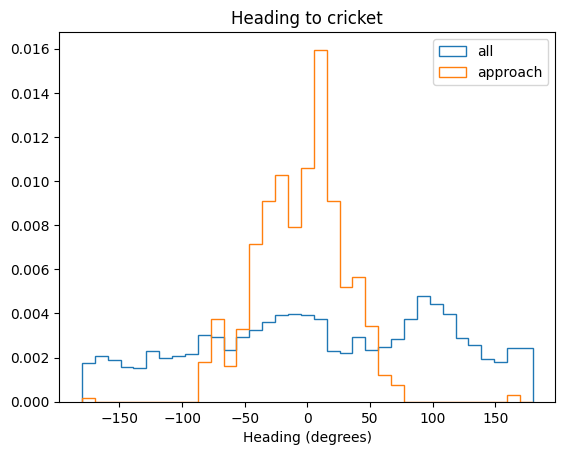

In [11]:
_= plt.hist(heading_cricket_mouse,
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'all')
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

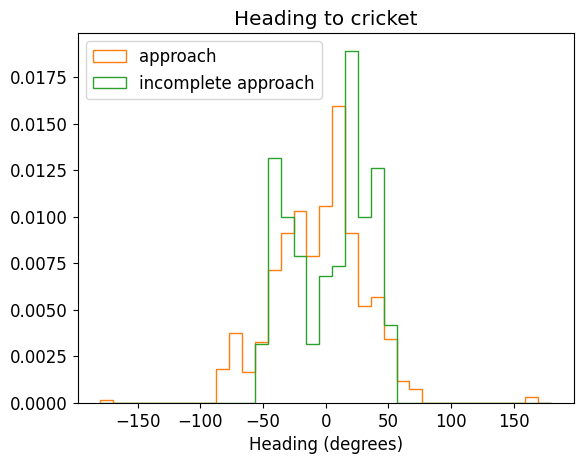

In [97]:
_ = plt.hist([])
_ = plt.hist(np.concatenate(approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'approach')
_ = plt.hist(np.concatenate(incomplete_approach_heading),
            bins = np.linspace(-180, 180, 36),
            histtype = 'step',density = True, label = 'incomplete approach')
plt.legend()
plt.xlabel('Heading (degrees)')
plt.title('Heading to cricket')
plt.legend()

In [12]:
def pad_sequences(sequences):
    max_len = max(len(seq) for seq in sequences)
    padded_sequences = np.array([np.pad(seq, (max_len - len(seq), 0),
                                    constant_values=np.nan)
                                for seq in sequences])
    return padded_sequences

In [13]:
speed_trial = []
cricket_azimuth = []

for start, end in approach_events:
    speed_trial.append(mouse_speed[start:end])
    cricket_azimuth.append(heading_cricket_mouse[start:end])

padded_speed_trial = pad_sequences(speed_trial)
padded_cricket_azimuth = pad_sequences(cricket_azimuth)

/tmp/ipykernel_10478/2046534689.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels(np.flip(current_ticks)+1)


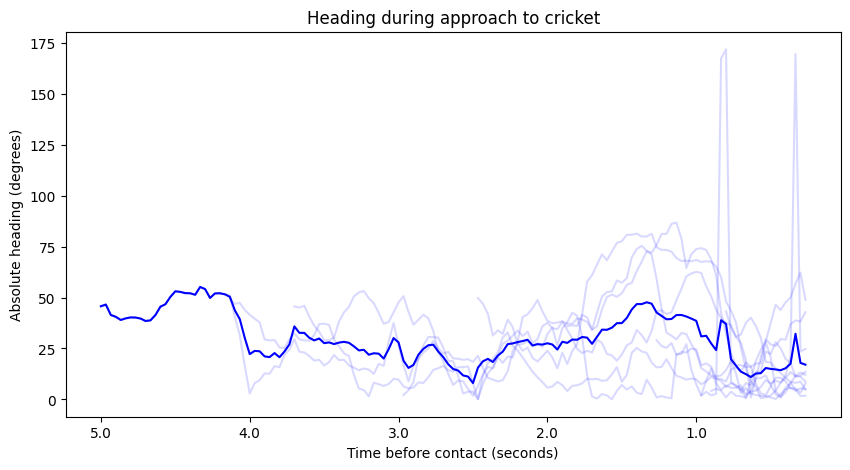

In [14]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_cricket_azimuth[0]))/30, np.abs(padded_cricket_azimuth).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_cricket_azimuth[0]))/30, np.nanmean(np.abs(padded_cricket_azimuth), axis=0), color='blue')
plt.ylabel('Absolute heading (degrees)')
plt.xlabel('Time before contact (seconds)')
plt.title('Heading during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels(np.flip(current_ticks)+1)
# plt.show()

/tmp/ipykernel_10478/2100600611.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = plt.gca().set_xticklabels(np.flip(current_ticks)+1)


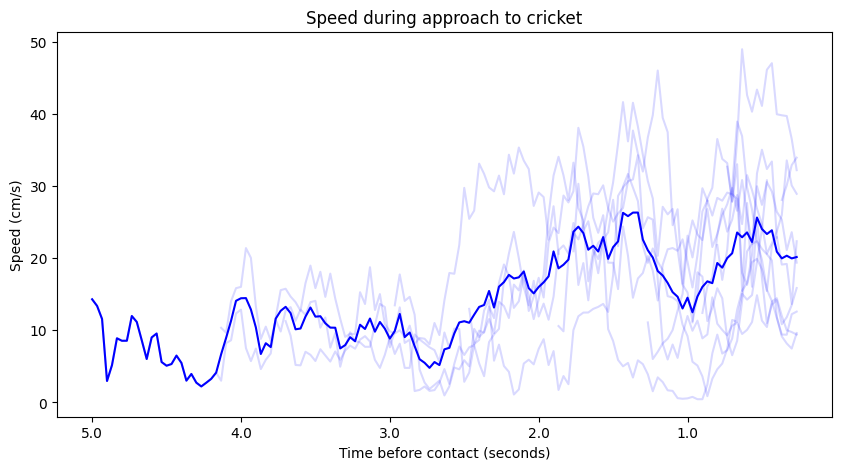

In [15]:
#plot the speed and azimuth
plt.figure(figsize=(10, 5))
# plt.plot(padded_speed_trial.T)
plt.plot(np.arange(len(padded_speed_trial[0]))/30, np.abs(padded_speed_trial).T, color='blue', alpha=0.15)
plt.plot(np.arange(len(padded_speed_trial[0]))/30, np.nanmean(np.abs(padded_speed_trial), axis=0), color='blue')
plt.ylabel('Speed (cm/s)')
plt.xlabel('Time before contact (seconds)')
plt.title('Speed during approach to cricket')
current_ticks = plt.gca().get_xticks()
_ = plt.gca().set_xticklabels(np.flip(current_ticks)+1)
# plt.show()

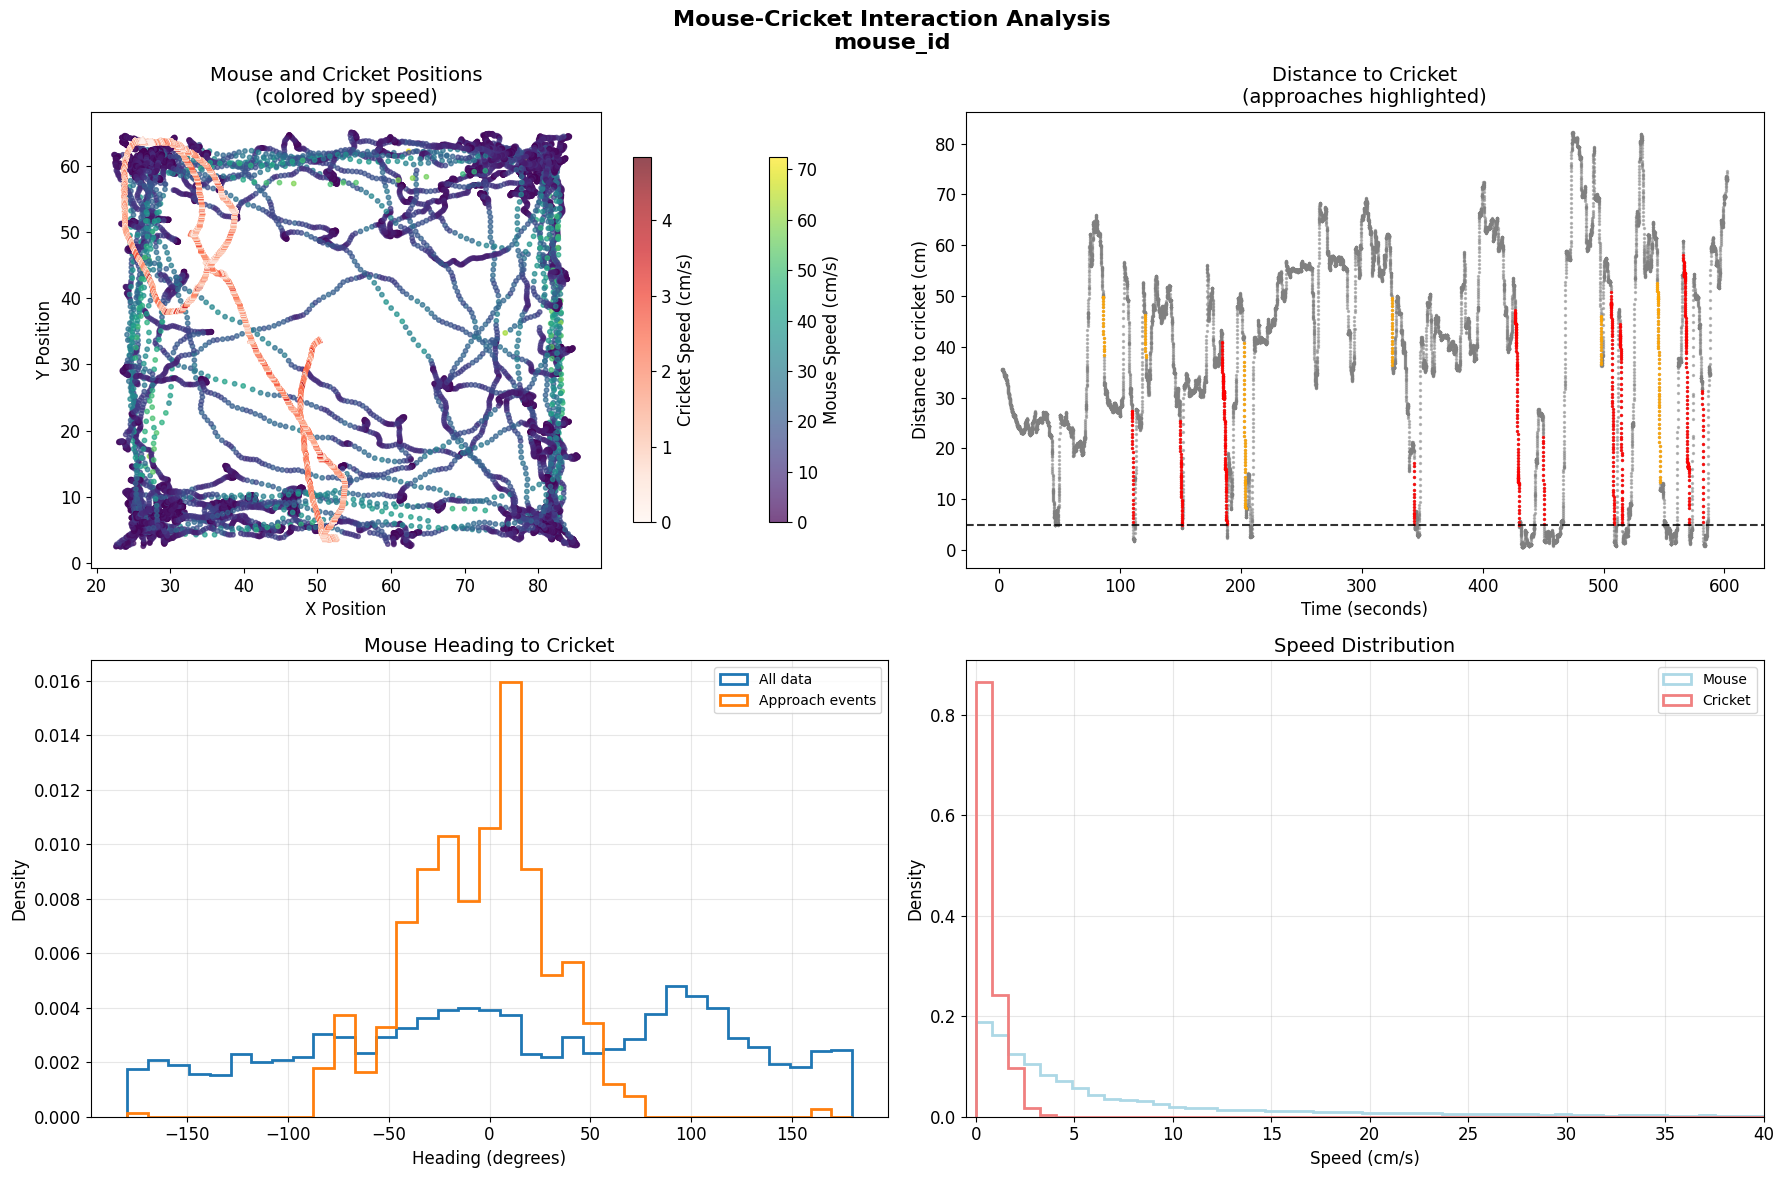

In [104]:
# Example usage:
fig = create_combined_analysis_plot(processed_file, mouse_x, mouse_y, mouse_speed, 
                                   cricket_speed, heading_cricket_mouse, distance_to_cricket, file_key = 'mouse_id')
plt.show()

In [105]:
group_1_files = glob.glob('/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/*.xlsx')

In [106]:
group_1_files

['/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D1-A_1_M-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D1-A_2_M-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D1-A_1_F-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed - Copy.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D5-A_2_F-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D2-A_2_M-1DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D3-A_1_M-3DeepCut_resnet50_CVvsGFprojectJul16shuffle1_1030000-processed.xlsx',
 '/home/arnab/Code/live_cricket_analysis/Suquoia_analysis/Control(CV)/D6-A_1_M-2DeepCut_resnet50_CV

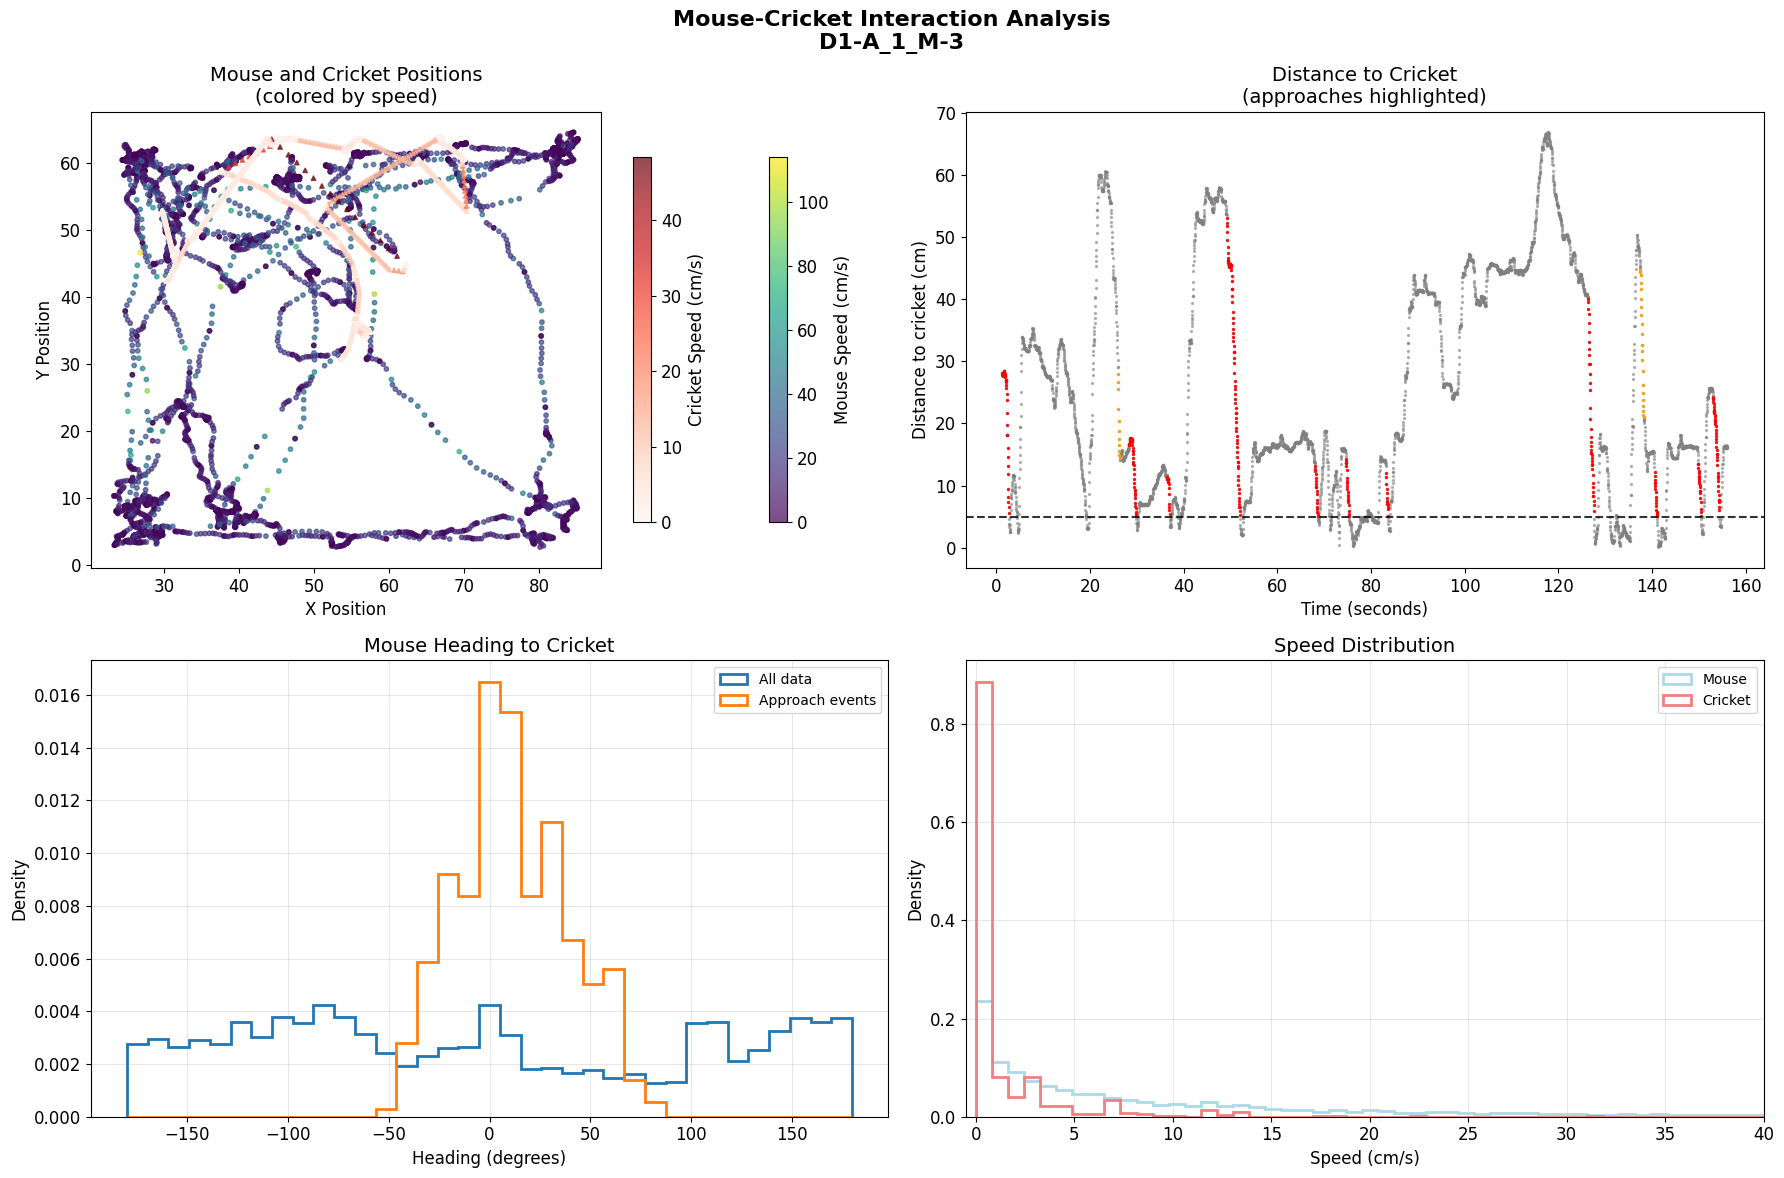

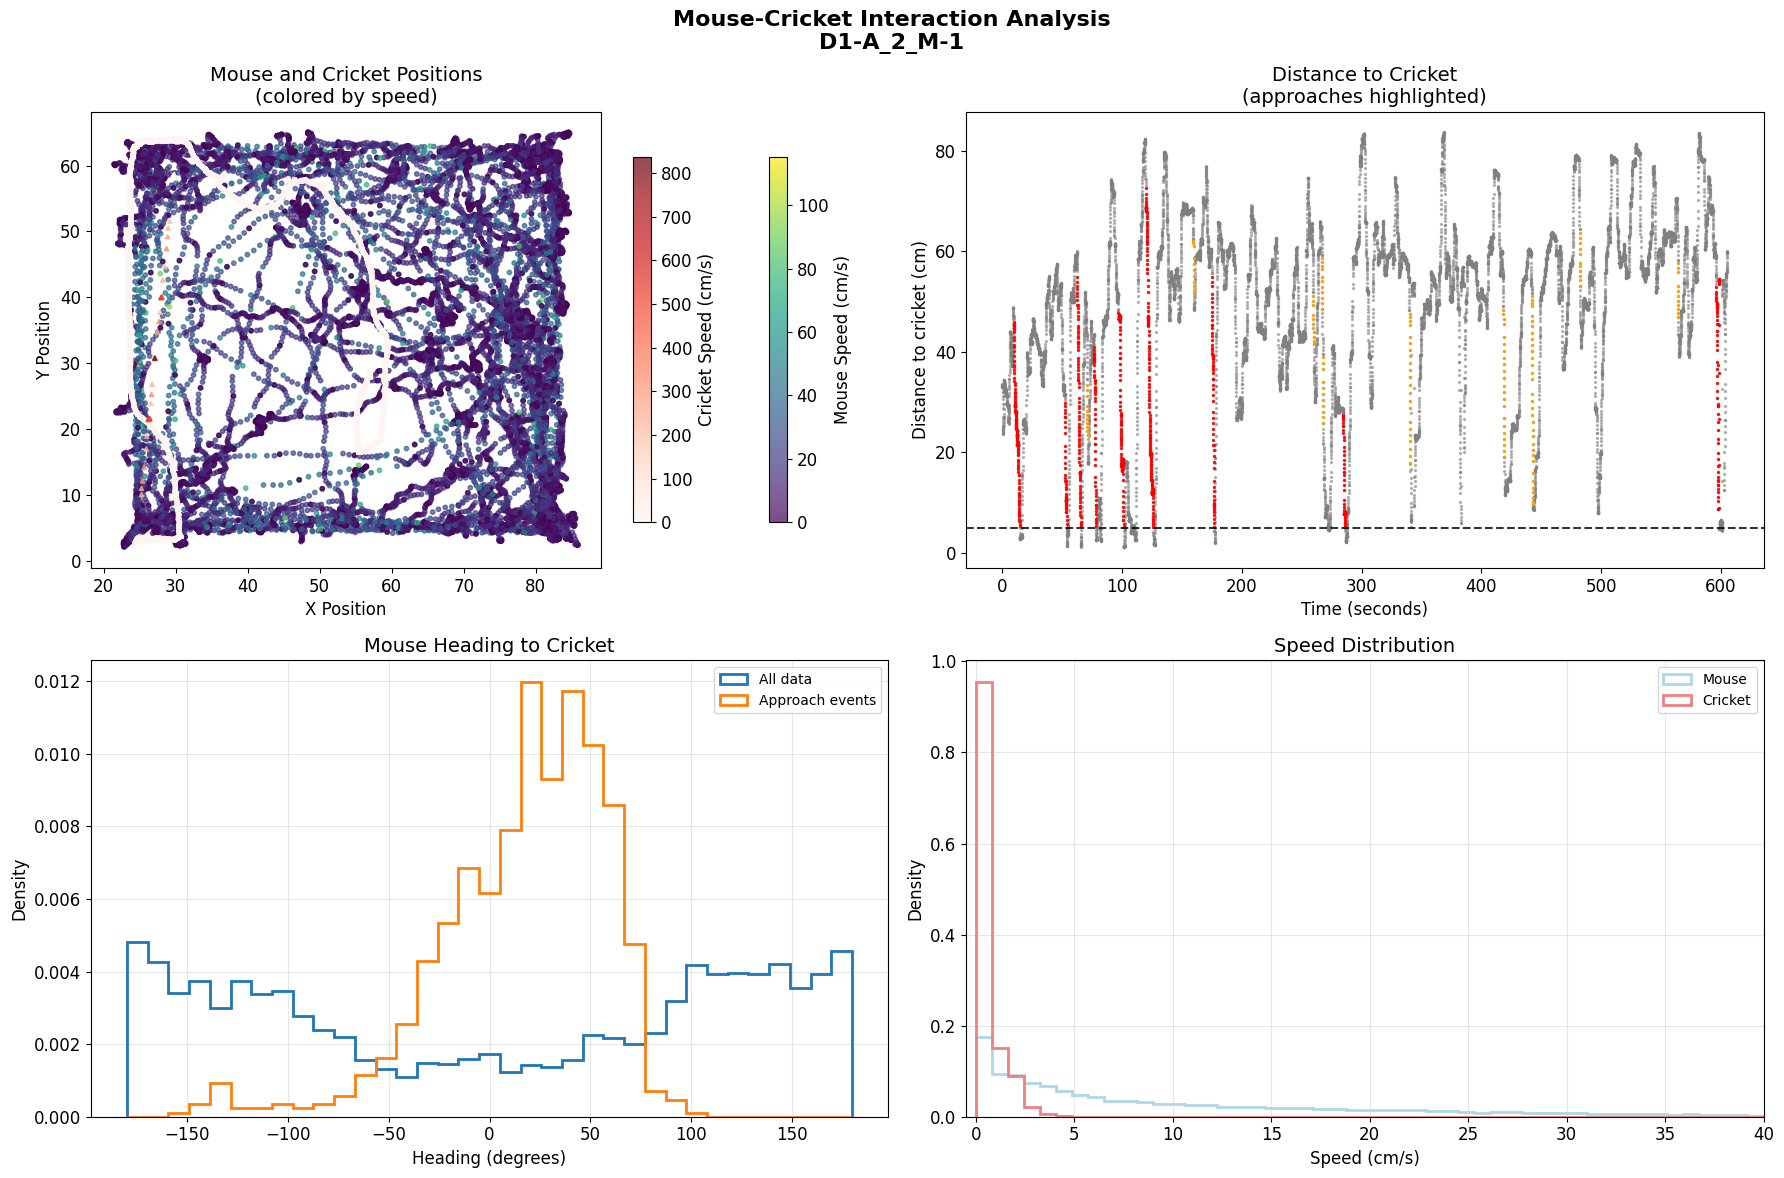

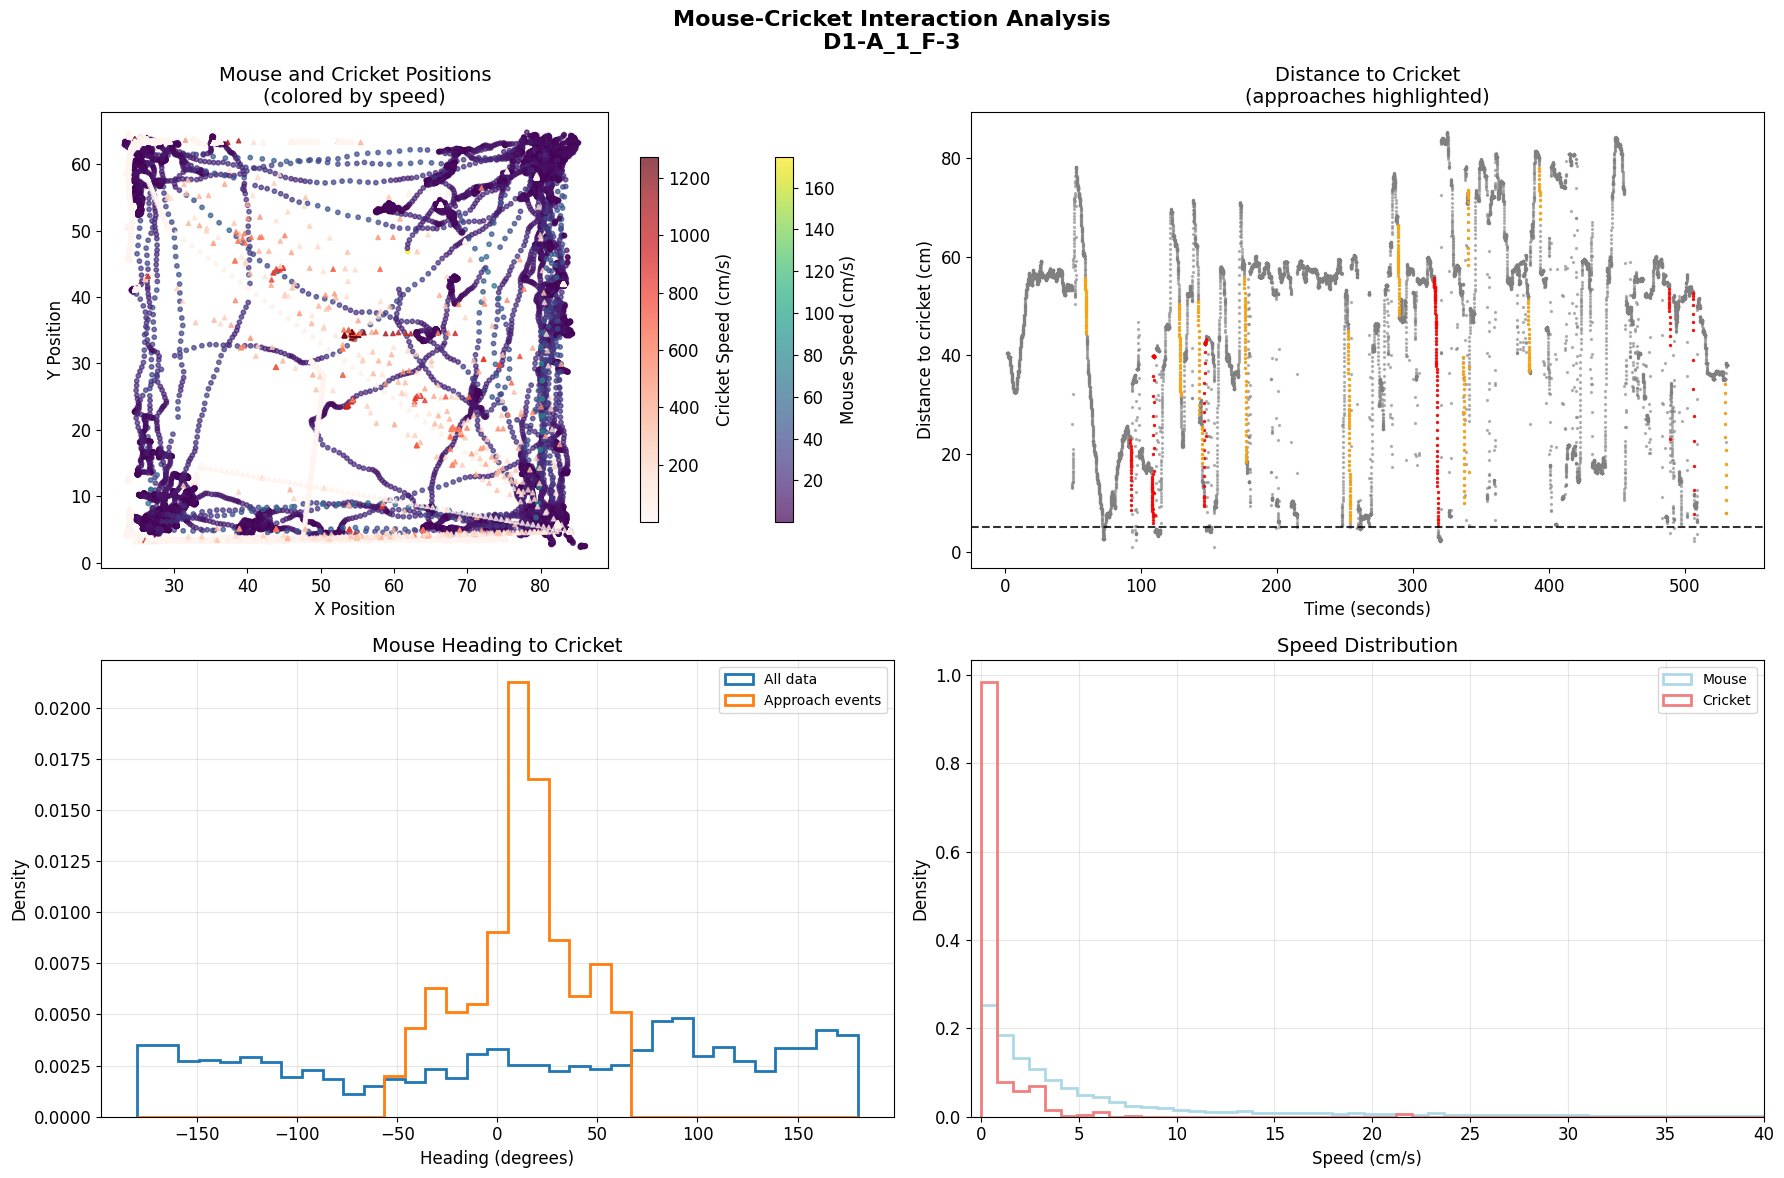

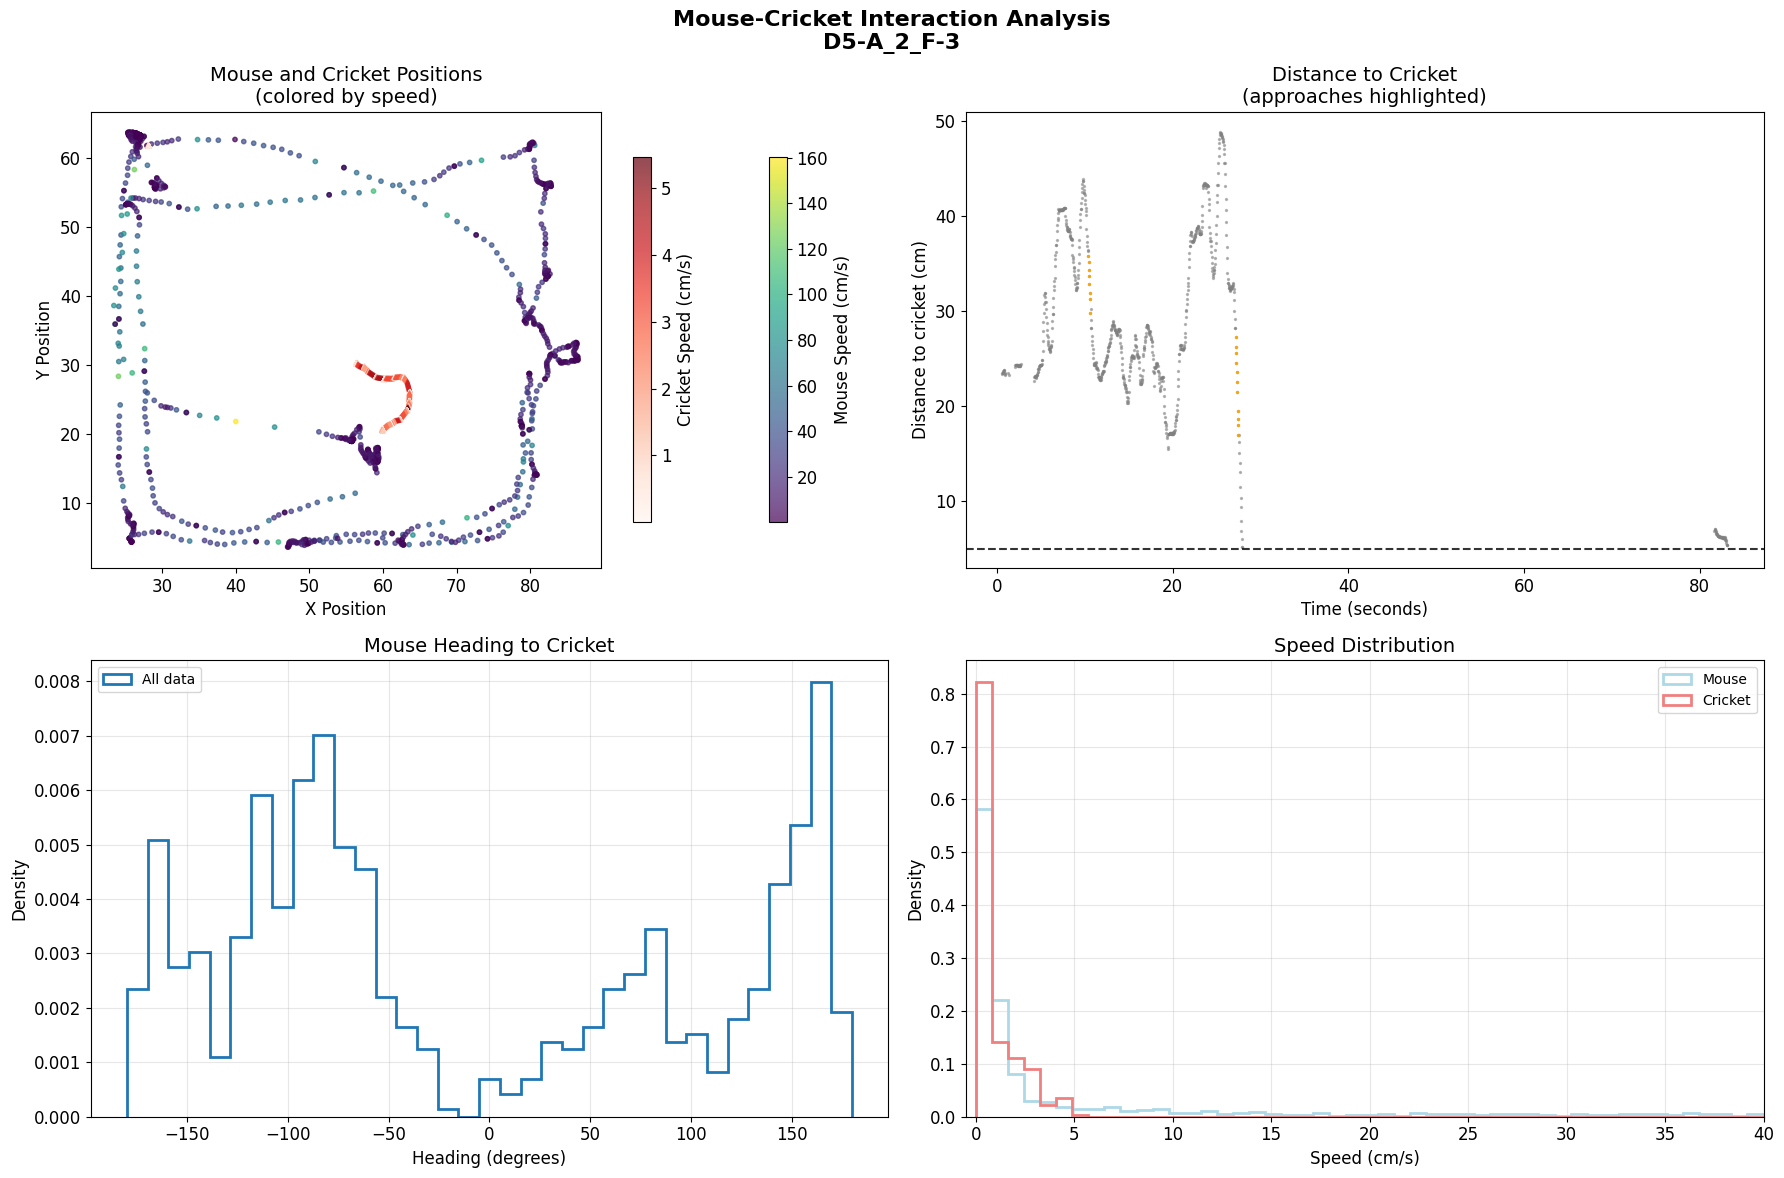

In [110]:
group_1_data = {}

for file in group_1_files[:4]:
    
    processed_file = pd.read_excel(file)
    mouse_x, mouse_y = get_mouse_centroid(processed_file)
    mouse_speed = get_mouse_speed(processed_file)
    cricket_speed = get_cricket_speed(processed_file)
    heading_cricket_mouse = get_mouse_heading_to_cricket(processed_file)
    distance_to_cricket = get_distance_to_cricket(processed_file)
    approach_events, incomplete_approach_events = get_approach_events(distance_to_cricket, mouse_speed, heading_cricket_mouse, processed_file)
    
    # Store data in dictionary
    file_key = file.split("/")[-1].split(".")[0].split('DeepCut')[0]
    group_1_data[file_key] = {
        'processed_file': processed_file,
        'mouse_x': mouse_x,
        'mouse_y': mouse_y,
        'mouse_speed': mouse_speed,
        'cricket_speed': cricket_speed,
        'heading_cricket_mouse': heading_cricket_mouse,
        'distance_to_cricket': distance_to_cricket,
        'approach_events': approach_events,
        'incomplete_approach_events': incomplete_approach_events
    }
    
    fig = create_combined_analysis_plot(processed_file,
                                        mouse_x,
                                        mouse_y,
                                        mouse_speed,
                                        cricket_speed,
                                        heading_cricket_mouse,
                                        distance_to_cricket,
                                        approach_events,
                                        file_key)

    output_dir = '/home/arnab/Code/live_cricket_analysis/outputs'
    os.makedirs(output_dir, exist_ok=True)
    save_path = f'{output_dir}/{file_key}_combined_analysis.png'
    plt.savefig(save_path)

    plt.show()

In [119]:
group_1_data['D1-A_1_M-3'].keys()

dict_keys(['processed_file', 'mouse_x', 'mouse_y', 'mouse_speed', 'cricket_speed', 'heading_cricket_mouse', 'distance_to_cricket', 'approach_events', 'incomplete_approach_events'])

In [17]:
# Find indices where full body freeze transitions from 1 to 0
transition_indices = np.where(np.diff(np.array(dataframe.FullBodyFreeze)) == -1)[0] + 1

array([  548,  3067,  3270,  3294,  4576,  4700,  4929,  5894,  7486,
        7518,  8106,  8483,  8522,  9389,  9493, 10059, 10086, 10289,
       10526, 10624, 10695, 12035, 12396, 12683, 12715, 12878, 12928,
       13222, 13404, 13669, 13833, 14402, 14623, 15364, 15914, 16692,
       16729, 17048, 17524, 17554])

In [18]:
fps = 30
n_post_freeze_seconds = 5
n_post_freeze_frames = n_post_freeze_seconds * fps

def compute_post_freeze_speeds(dataframe,
                            transition_indices,
                            fps=30,
                            n_post_freeze_seconds=5,
                            return_end_idx = False):
    #check heading
    n_post_freeze_frames = n_post_freeze_seconds * fps
    epoch_speeds = []
    if return_end_idx:
        end_idxs = []
    for i, transition_index in enumerate(transition_indices):

        end_index = min(transition_index + n_post_freeze_frames, len(dataframe))
        
        # Check for freeze periods
        freeze_indices = np.where(dataframe.FullBodyFreeze.iloc[transition_index:end_index] == 1)[0]
        if freeze_indices.size > 0:
            end_index = transition_index + freeze_indices[0]
        
        # Check if next transition is too close
        if i < len(transition_indices) - 1:
            next_transition_index = transition_indices[i + 1]
            if next_transition_index - end_index < n_post_freeze_frames:
                end_index = next_transition_index
        
        epoch_speeds.append(get_speed(dataframe, transition_index, end_index))
        if return_end_idx:
            end_idxs.append(end_index)
    if return_end_idx:
        return epoch_speeds, end_idxs
    else:
        return epoch_speeds


In [22]:
from glob import glob
group_1_files = glob('./Control(CV)/*.xlsx')
group_2_files = glob('./Germ-free(GF)/*.xlsx')

In [23]:
transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    

In [24]:
len(group_1_files)

83

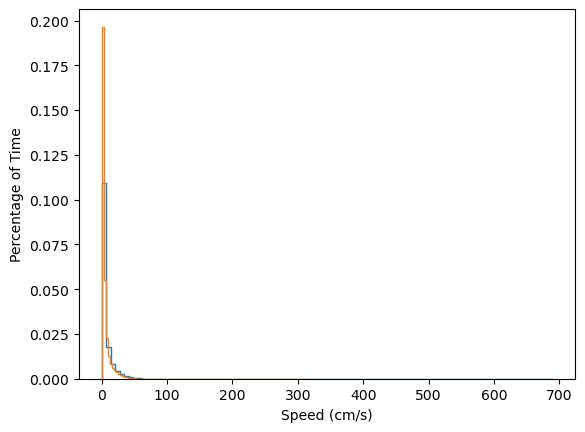

In [26]:
group_1_speeds = []
group_2_speeds = []
group_1_headings = []
group_1_cricket_azimuths = []
group_2_headings = []
group_2_cricket_azimuths = []
for file in group_1_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_1_speeds.extend(speeds)
    for i in range(len(transition_indices)):
        heading, cricket_azimuth = get_mouse_heading(dataframe, (transition_indices[i], return_cricket_azimuth=True)
        group_1_headings.append(heading)
        group_1_cricket_azimuths.append(cricket_azimuth)
for file in group_2_files:
    dataframe = pd.read_excel(file)
    transition_indices = np.where(np.diff(dataframe.FullBodyFreeze) == -1)[0] + 1
    speeds = compute_post_freeze_speeds(dataframe, transition_indices, fps=30, n_post_freeze_seconds=5)
    group_2_speeds.extend(speeds)

In [41]:
def pad_speed_sequences(speed_sequences):
    # Find max length of sequences
    max_len = max(len(seq) for seq in speed_sequences)

    # Create padded array with nans
    padded_speeds = np.array([np.pad(seq, (0, max_len - len(seq)),
                                    constant_values=np.nan)
                             for seq in speed_sequences])
    return padded_speeds

In [76]:
padded_speeds_1 = pad_speed_sequences(group_1_speeds)
padded_speeds_2 = pad_speed_sequences(group_2_speeds)
mean_1 = np.nanmean(padded_speeds_1, axis=0)
mean_2 = np.nanmean(padded_speeds_2, axis=0)

# confidence_level = 0.95  # 95% confidence interval
# n1 = np.sum(~np.isnan(padded_speeds_1), axis=0)  # number of non-nan values at each timepoint
# n2 = np.sum(~np.isnan(padded_speeds_2), axis=0)
# sem_1 = np.nanstd(padded_speeds_1, axis=0) / np.sqrt(n1)
# sem_2 = np.nanstd(padded_speeds_2, axis=0) / np.sqrt(n2)
# ci_1 = sem_1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
# ci_2 = sem_2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)

plt.plot(mean_1)
# plt.fill_between(range(len(mean_1)), mean_1-ci_1, mean_1+ci_1, alpha=0.3)
plt.plot(mean_2)
# plt.fill_between(range(len(mean_2)), mean_2-ci_2, mean_2+ci_2, alpha=0.3)
# plt.legend()

NameError: name 'pad_speed_sequences' is not defined

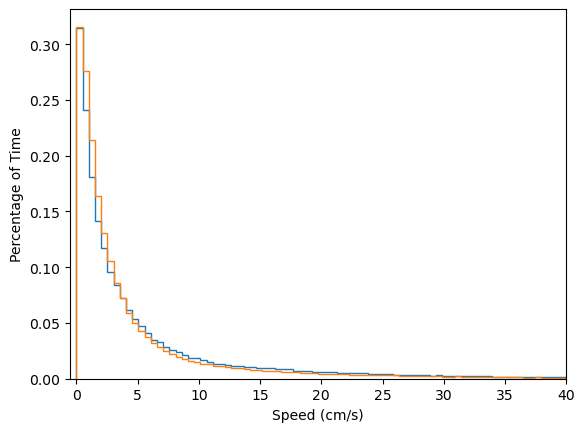

In [28]:
plt.hist(np.concatenate(group_1_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.hist(np.concatenate(group_2_speeds), bins=np.linspace(0, 40, 80), density=True, histtype='step')
plt.xlim(-0.5, 40)
plt.ylabel('Percentage of Time')
plt.xlabel('Speed (cm/s)')
plt.show()

In [ ]:
#Video with labels in top right corner for approach, speed (changes color)
# heading and arrow
# Centroid with alpha dots history for 4 seconds
# Cricket trajectory - alpha dot